In [4]:
print("hello World")

hello World


In [33]:
#importing the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.despine()
sns.set(style='white')
sns.set_palette('rocket_r')

<Figure size 640x480 with 0 Axes>

In [6]:
#reading the dataset
df=pd.read_csv('product_sales.csv')
print(df.head())

   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0              28   Illinois  


##Data Cleaning and Validation

In [7]:
#Unifying the columns' content to contain only the three sales methods (Call, Call&Email, Email)
df['sales_method'] = df['sales_method'].str.replace('em \+ call', 'Email + Call', regex=True)

In [8]:
df['sales_method'] = df['sales_method'].str.replace('email', 'Email', regex=True)

In [9]:
#checking for the values to make sure
unique_values = df['sales_method'].unique()
print(unique_values)

['Email' 'Email + Call' 'Call']


In [11]:
#Check for data types and shape
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

check(df)

#to know the data shape
print('Shape:',df.shape)

Shape: (15000, 8)


In [15]:
#since the company was established in 1984 and we are in 2024 then this means that it have 40 years since the company's establishment
#thus any year earlier than 40 years doesn't make sense accordingly two rows were deleted from the data.
df = df[df['years_as_customer'] <= 40]
print('Shape:',df.shape)

Shape: (14998, 8)


In [16]:
#check for duplicates and correlations between variables
df.duplicated().sum()

0

In [17]:
#to detect outliers
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.select_dtypes(include=['float64', 'int64']):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers])
    return outliers

# Detect outliers for all columns
outliers = detect_outliers_iqr(df)
print("Outliers in multiple columns:\n", outliers)

Outliers in multiple columns:
        week  sales_method                           customer_id  nb_sold  \
1         6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   
17        6  Email + Call  d10690f0-6f63-409f-a1da-8ab0e5388390       15   
82        6  Email + Call  9a39d6f6-ef55-4812-ad9d-0016d6285ff7       15   
99        6  Email + Call  9cdb45ba-c27a-4a32-9dae-108e5a6d5140       15   
127       6  Email + Call  10fa5dcd-7223-463e-8aba-4df870894d05       15   
...     ...           ...                                   ...      ...   
14590     5         Email  9799596c-42d9-457d-97e2-b0512279a1f9       10   
14727     6          Call  14f5217b-7b5d-47b8-93bb-88a696f8b23f       13   
14740     4         Email  3a761b7e-0d08-4569-b00b-1ea0c1433090       12   
14846     3  Email + Call  caf99d0a-c578-4cfd-91e0-2c0e74352f1f       10   
14992     5  Email + Call  cd9e6945-ae21-4bed-a6cf-f0302e6c4795       12   

       revenue  years_as_customer  nb_site_visits       

In [19]:
#since outliers were detected in our data the outliers in the revenue will have a log transformation
#which may be useful in future analysis and predictive model building, however the original revenue column will be used here to understand the raw data more
df['log_revenue'] = np.log1p(df['revenue'])

###Fig 1

Text(0.5, 1.0, 'Original Revenue Distribution')

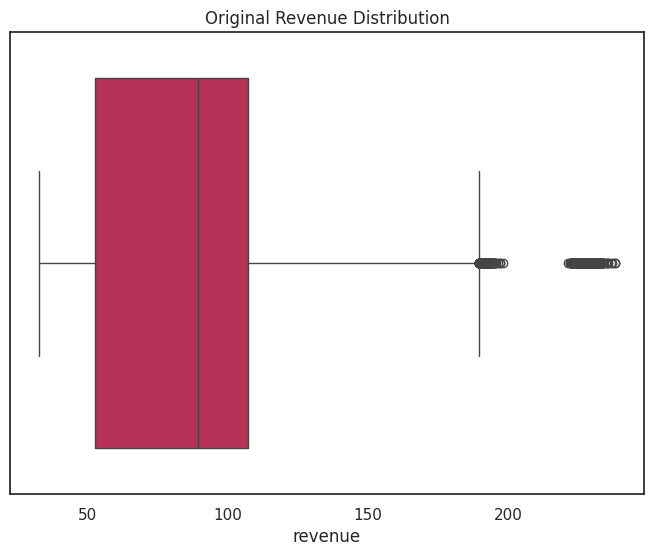

In [34]:
plt.figure(figsize=(18, 6))

# Original 'revenue' boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['revenue'], palette='rocket')
plt.title('Original Revenue Distribution')

###Fig 2

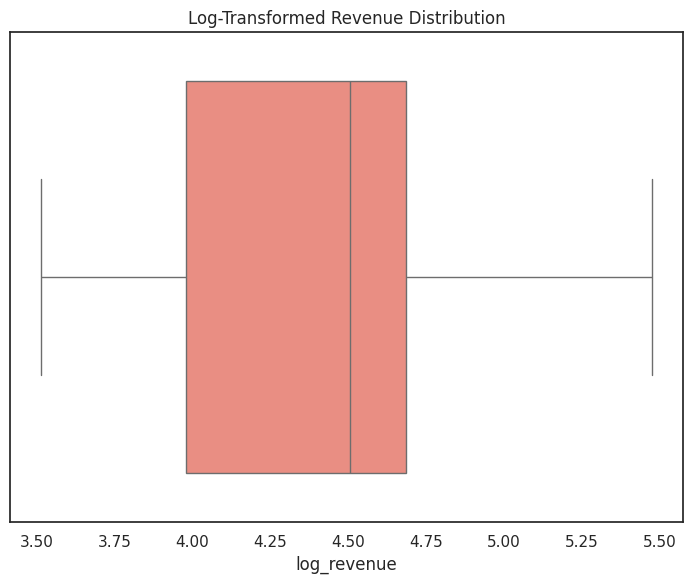

In [35]:
# All of the outliers were solved in the log transformation
# Log-transformed 'log_revenue' boxplot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x=df['log_revenue'], palette='dark:salmon_r')
plt.title('Log-Transformed Revenue Distribution')

plt.tight_layout()
plt.show()

In [38]:
# Detect outliers in the original 'revenue' using IQR method
Q1_revenue = df['revenue'].quantile(0.25)
Q3_revenue = df['revenue'].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue
lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

outliers_revenue = df[(df['revenue'] < lower_bound_revenue) | (df['revenue'] > upper_bound_revenue)]

# Detect outliers in the log-transformed 'log_revenue' using IQR method
Q1_log_revenue = df['log_revenue'].quantile(0.25)
Q3_log_revenue = df['log_revenue'].quantile(0.75)
IQR_log_revenue = Q3_log_revenue - Q1_log_revenue
lower_bound_log_revenue = Q1_log_revenue - 1.5 * IQR_log_revenue
upper_bound_log_revenue = Q3_log_revenue + 1.5 * IQR_log_revenue

outliers_log_revenue = df[(df['log_revenue'] < lower_bound_log_revenue) | (df['log_revenue'] > upper_bound_log_revenue)]

# Compare the number of outliers before and after transformation
print(f"Number of outliers in original 'revenue': {len(outliers_revenue)}")
print(f"Number of outliers in log-transformed 'log_revenue': {len(outliers_log_revenue)}")
#No outliers were detected in the log-transformed column

Number of outliers in original 'revenue': 634
Number of outliers in log-transformed 'log_revenue': 0


###Fig 3

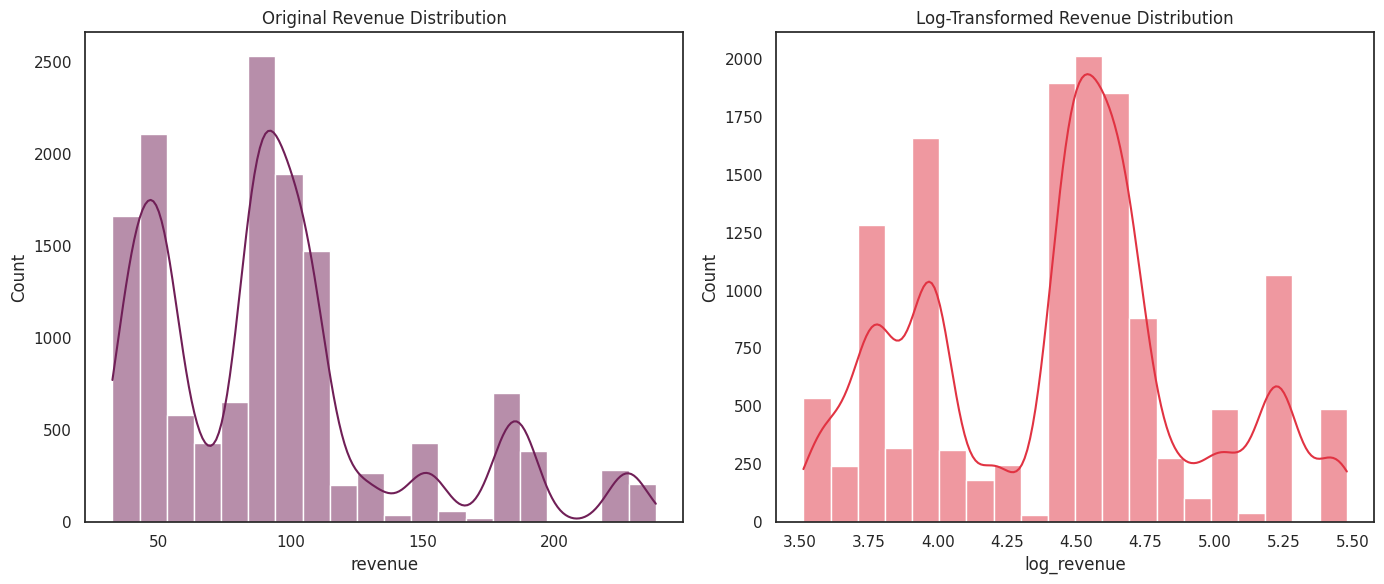

In [36]:
# The two revenue columns were plotted to see the distribution of the revenue before and after the transformation. It became less skewed and more stable however since our goal is to understand the raw distribution of revenue or how much each customer is contributing to overall sales, you the original revenue will be used in the rest of the analysis to solve the business problem in hand.
plt.figure(figsize=(14, 6))

# Original 'revenue' histogram
plt.subplot(1, 2, 1)
sns.histplot(df['revenue'], kde=True, bins=20, color=sns.color_palette('rocket')[1])
plt.title('Original Revenue Distribution')

# Log-transformed 'log_revenue' histogram
plt.subplot(1, 2, 2)
sns.histplot(df['log_revenue'], kde=True, bins=20, color=sns.color_palette('rocket')[3])
plt.title('Log-Transformed Revenue Distribution')

plt.tight_layout()
plt.show()

In [37]:
#the mean is much reduced in the log-transfromed revenue column and standard deviation is much lower indicating a more stable normalized revenue.
revenue_stats = df['revenue'].describe()

# Summary statistics for the log-transformed 'log_revenue'
log_revenue_stats = df['log_revenue'].describe()

print("Summary Statistics for Original Revenue:")
print(revenue_stats)
print("\nSummary Statistics for Log-Transformed Revenue:")
print(log_revenue_stats)

Summary Statistics for Original Revenue:
count    13924.000000
mean        93.937828
std         47.437281
min         32.540000
25%         52.470000
50%         89.500000
75%        107.330000
max        238.320000
Name: revenue, dtype: float64

Summary Statistics for Log-Transformed Revenue:
count    13924.000000
mean         4.435529
std          0.486260
min          3.512739
25%          3.979121
50%          4.505350
75%          4.685182
max          5.477802
Name: log_revenue, dtype: float64


###Fig 4

<Axes: >

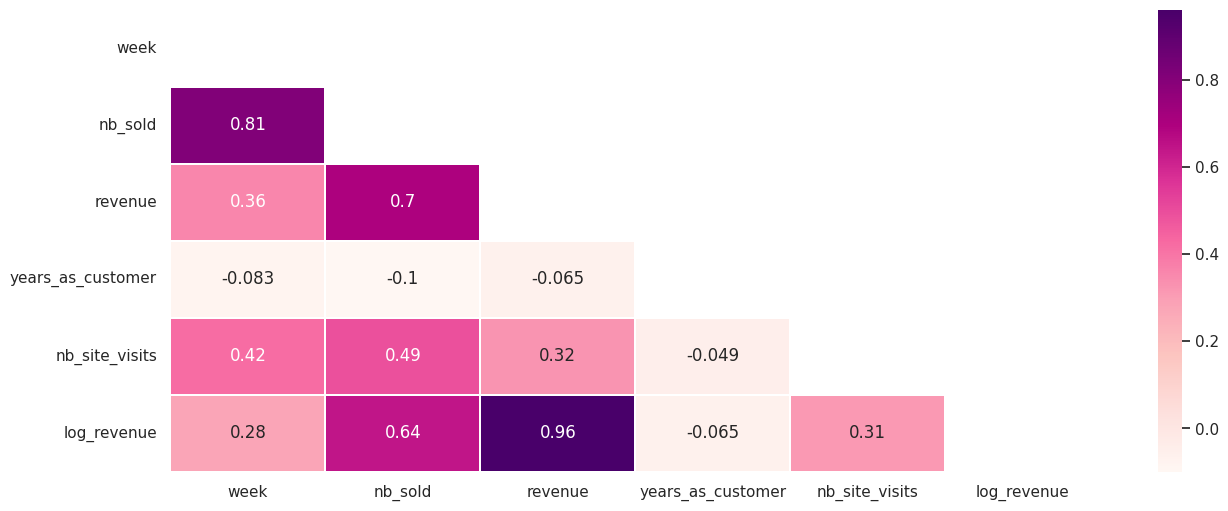

In [43]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
corrmat = numeric_df.corr()

# Create the heatmap
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corrmat, ax=ax, mask=np.triu(np.ones_like(corrmat, dtype=bool)),
            annot=True, annot_kws={"size": 12}, linewidths=0.1, cmap='RdPu', fmt='0.2')

#there is a positive correlation between no. of new products sold and weeks.
#there is a positive correlation between revenue and no.of new products sold.

##Revenue generated from each method

In [47]:
#revenue generated from each approach
revenue_per_method = df.groupby('sales_method')['revenue'].sum().reset_index()
print(revenue_per_method)

   sales_method    revenue
0          Call  227513.02
1         Email  672220.61
2  Email + Call  408256.69


###Fig 5

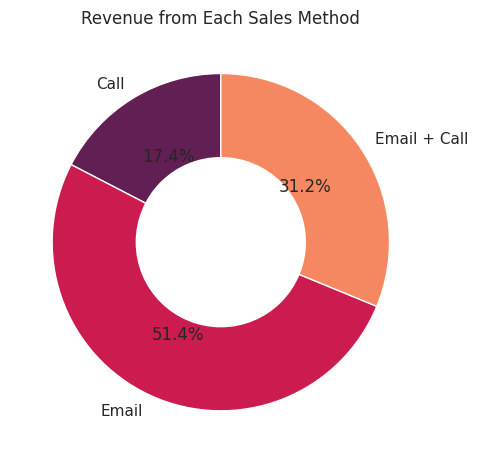

In [48]:
sizes = revenue_per_method['revenue']
labels = revenue_per_method['sales_method']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('rocket', len(sizes)))
centre_circle = plt.Circle((0,0), 0.50, color='white', fc='white', linewidth=1.25)
plt.gca().add_artist(centre_circle)
plt.title('Revenue from Each Sales Method')
plt.tight_layout()
plt.show()

##No. of customers in each sales method

In [45]:
#no. of customers in each approach
result = df.groupby('sales_method')['customer_id'].nunique().reset_index(name='customer_count')
print(result)

   sales_method  customer_count
0          Call            4961
1         Email            7465
2  Email + Call            2572


###Fig 6

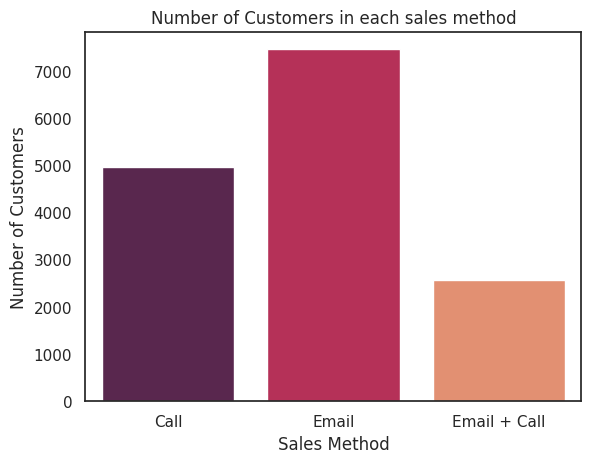

In [49]:
sns.barplot(data=result, x='sales_method', y='customer_count', palette='rocket')

plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in each sales method')

plt.show()

In [50]:
merged = pd.merge(result, revenue_per_method, on='sales_method')
merged['revenue_per_customer'] = merged['revenue'] / merged['customer_count']
print(merged[['sales_method', 'revenue_per_customer']])
#The Email + Call approach has the highest revenue per customer

   sales_method  revenue_per_customer
0          Call             45.860314
1         Email             90.049646
2  Email + Call            158.731217


##Plotting the spread of the overall revenue, and the revenue for each method.

###Fig 7

count    13924.000000
mean        93.937828
std         47.437281
min         32.540000
25%         52.470000
50%         89.500000
75%        107.330000
max        238.320000
Name: revenue, dtype: float64


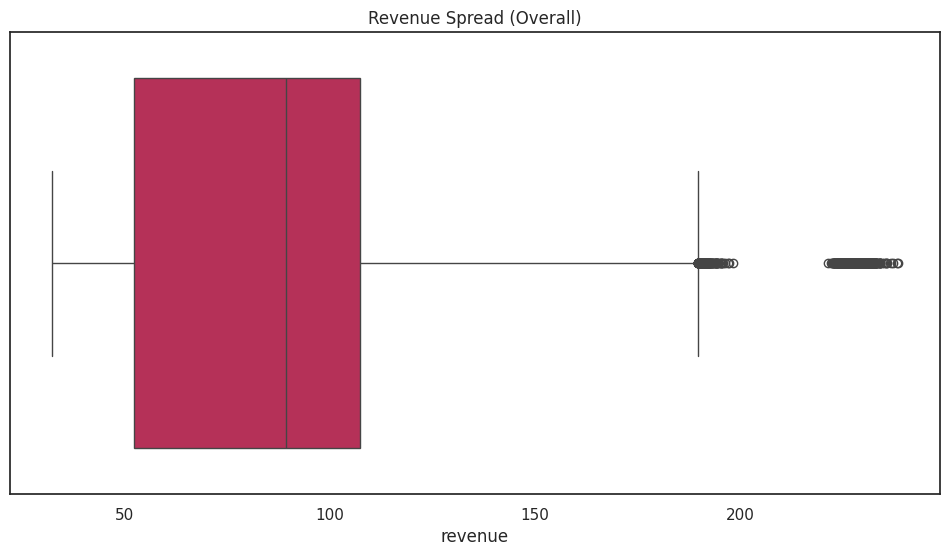

In [54]:
# Descriptive statistics for revenue
overall_revenue_stats = df['revenue'].describe()
print(overall_revenue_stats)

# Visualizing the spread of revenue with a boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['revenue'],palette='rocket' )
plt.title('Revenue Spread (Overall)')
plt.show()
#this boxplot shows that 50% of the data(box) lies between 50 to 100, and that there are alot of outliers that exceeds the upper limit.

###Fig 8

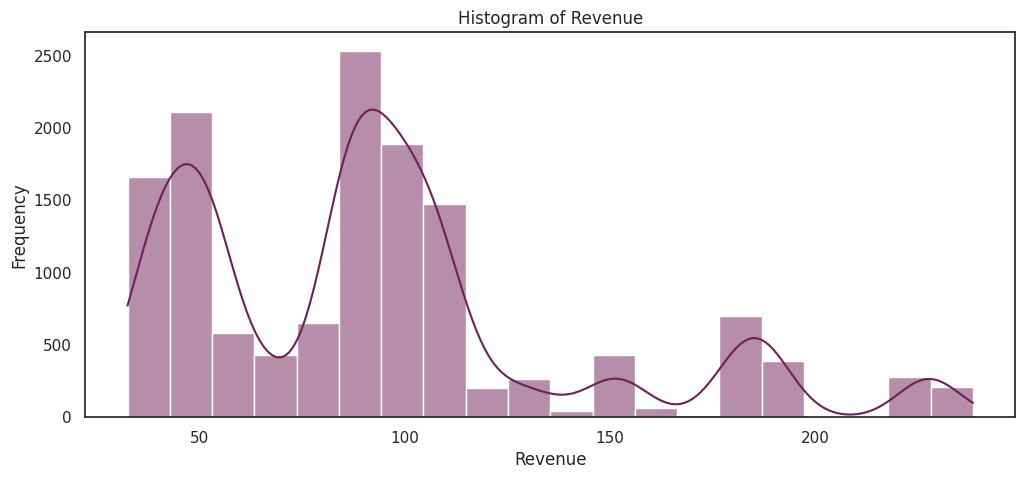

In [57]:
plt.figure(figsize=(12, 5))
sns.histplot(df['revenue'], bins=20, kde=True, color=sns.color_palette('rocket')[1])  # kde=True adds a kernel density estimate
plt.title('Histogram of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()
#the spread of the revenue is quite wide, which means there is alot of variations in the revenue and it is right skewed.
#The revenue is somehow unpredictable, this could mean a mix of high-risk high-reward opportunities, as well as some volatility.

###Fig 9

               count        mean        std     min      25%     50%     75%  \
sales_method                                                                   
Call          4780.0   47.596866   8.610699   32.54   41.470   49.05   52.68   
Email         6921.0   97.127671  11.211279   78.83   87.880   95.58  105.17   
Email + Call  2223.0  183.651233  29.083924  122.11  155.775  184.74  191.11   

                 max  
sales_method          
Call           71.36  
Email         148.97  
Email + Call  238.32  


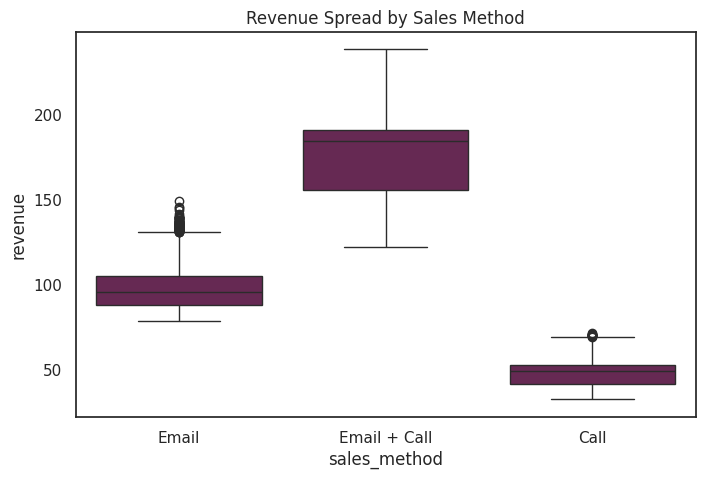

In [61]:
# Group by sales method and calculate descriptive statistics for revenue
revenue_by_method = df.groupby('sales_method')['revenue'].describe()
print(revenue_by_method)

# Visualize the spread of revenue by sales method
plt.figure(figsize=(8, 5))
sns.boxplot(x='sales_method', y='revenue', data=df, color=sns.color_palette('rocket')[1])
plt.title('Revenue Spread by Sales Method')
plt.show()
#the email+call is the most stable method that doesn't contain outliers

###Fig 10

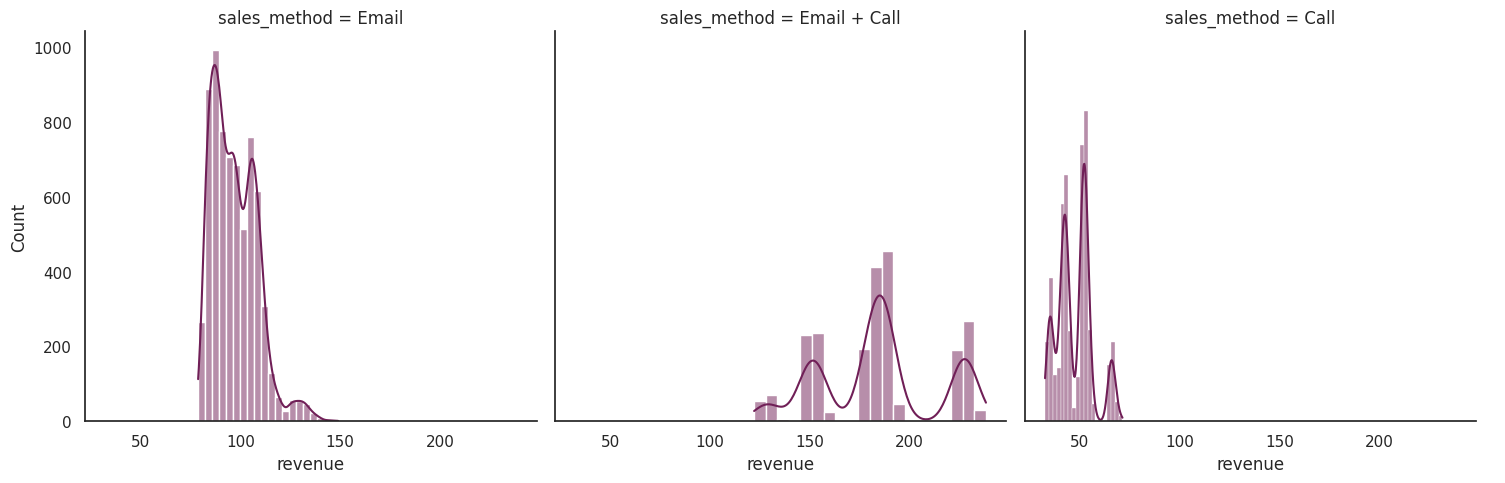

In [62]:
g = sns.FacetGrid(df, col='sales_method', col_wrap=3, height=5)
g.map(sns.histplot, 'revenue', bins=20, kde=True, color=sns.color_palette('rocket')[1])
g.add_legend()
plt.show()
#in the email hist: Most of the revenue values fall between 50 and 150, The density plot peaks around 100, indicating this is the most common revenue for this method.
#in Email + Call: Revenue values are more spread out, ranging from 50 to 200, Multiple peaks in the density plot, especially around 75 and 150, suggesting variability in revenue.
#The majority of revenue values also fall between 50 and 150, similar to Email, A peak around 100 in the density plot, like the Email method, but with a slightly higher density.
##Best Method
#- If you're aiming to maximize revenue, the *Email + Call* method looks promising due to its wider range and multiple high peaks.
#- For consistency, the *Email* or *Call* methods are more stable with revenue concentrated around 100.

##Ploting the trend of each sales method across the sales weeks since the product launch.

###Fig 11

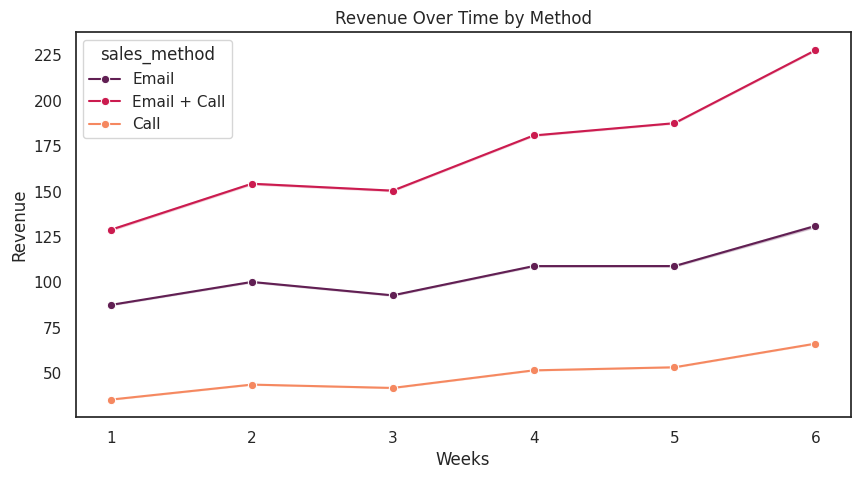

In [64]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='week', y='revenue', palette='rocket', hue='sales_method', marker='o')
plt.title('Revenue Over Time by Method')
plt.xlabel('Weeks')
plt.ylabel('Revenue')
plt.show()

##Plotting a heatmap to view which state have the highest number of new products sold.

###Fig 12

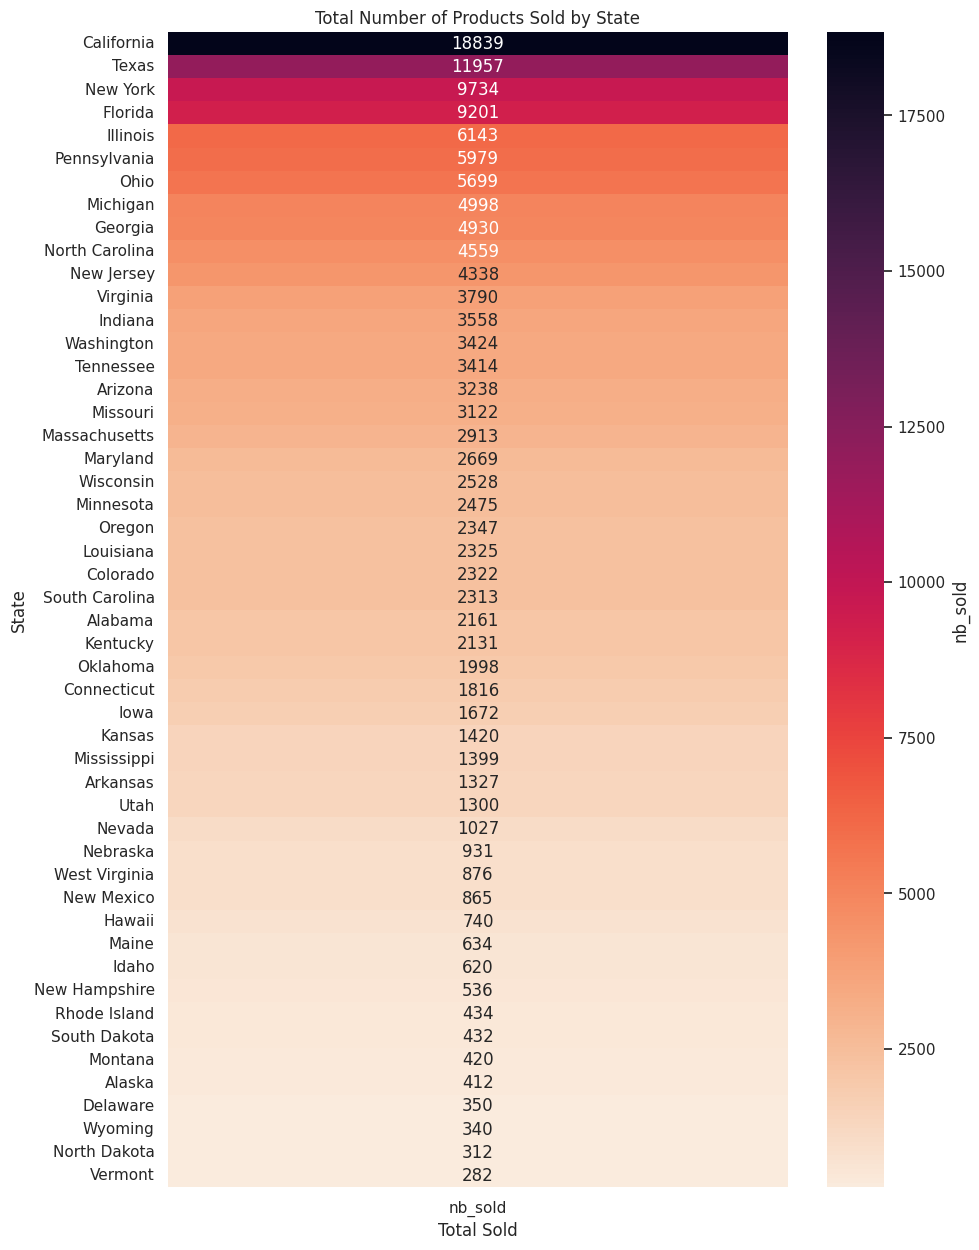

In [66]:
pivot_df = df.groupby('state')['nb_sold'].sum().reset_index()
pivot_df = pivot_df.sort_values(by='nb_sold', ascending=False)
heatmap_data = pivot_df.set_index('state')

plt.figure(figsize=(10, 15))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='rocket_r', cbar_kws={'label': 'nb_sold'})

# Customize the plot
plt.title('Total Number of Products Sold by State')
plt.xlabel('Total Sold')
plt.ylabel('State')
plt.show()